# Finals Assignment

> Made by Niles Vincent Gabrielle Rondez

Read about (Susanna Epp pp. 704):

1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

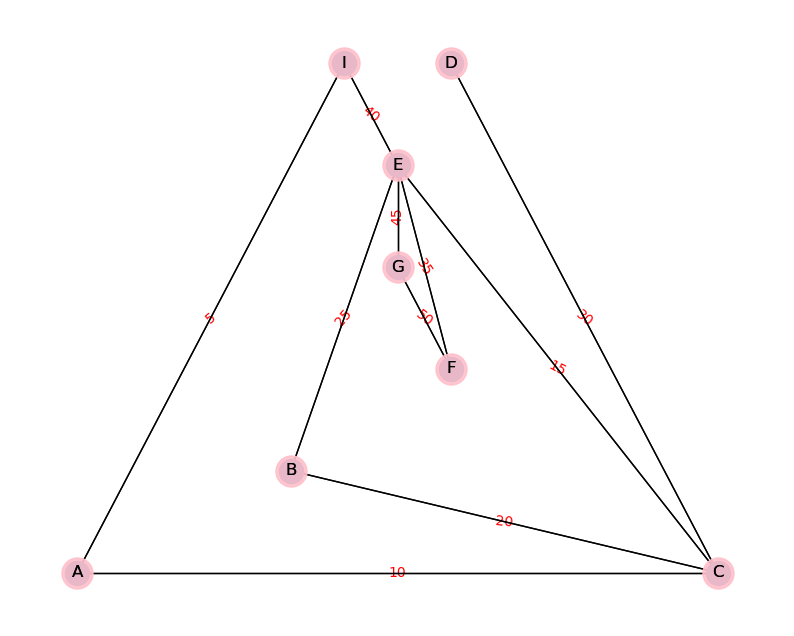

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

## Kruskal's Algorithm Implementation

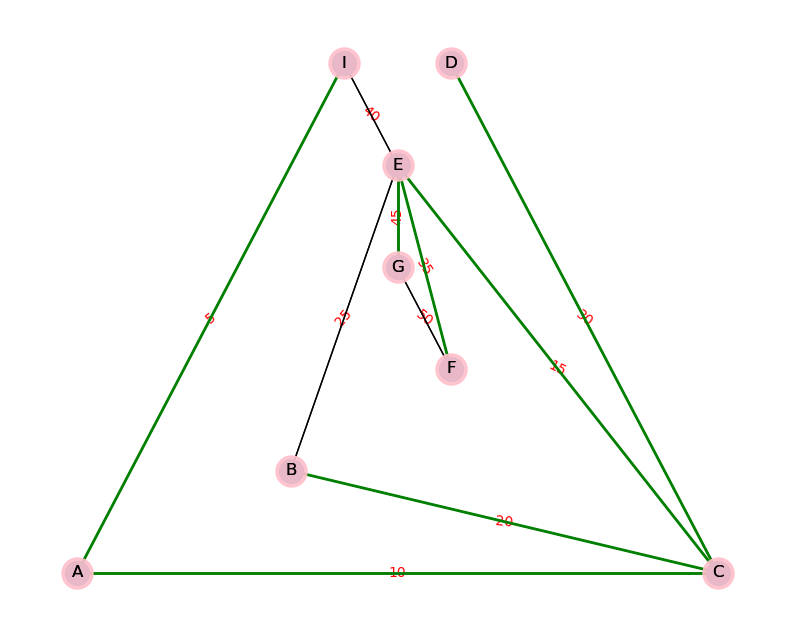

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C",{'weight':10}),("A","I",{'weight':5}),("C","B",{'weight':20}),("C","E",{'weight':15}),("C","D",{'weight':30}),("B","E",{'weight':25}),("I","E",{'weight':40}),("E","F",{'weight':35}),("F","G",{'weight':50}),("G","E",{'weight':45})]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

# Kruskal's Algorithm
def kruskie(G):
    result = nx.Graph()
    sortedEdges = sorted(G.edges(data = True), key = lambda x : x[2]['weight'])
    forest = {node : {node} for node in G.nodes()}
    
    for i, j, k in sortedEdges :
        if forest[i] != forest[j] :
            result.add_edge(i, j, weight = k['weight'])
            new = forest[i].union(forest[j])
            for node in new :
                forest[node] = new
    
    return result

result = kruskie(G)
nx.draw_networkx_edges(result, pos, edge_color='green', width=2)

plt.show()

## Prim's Algorithm

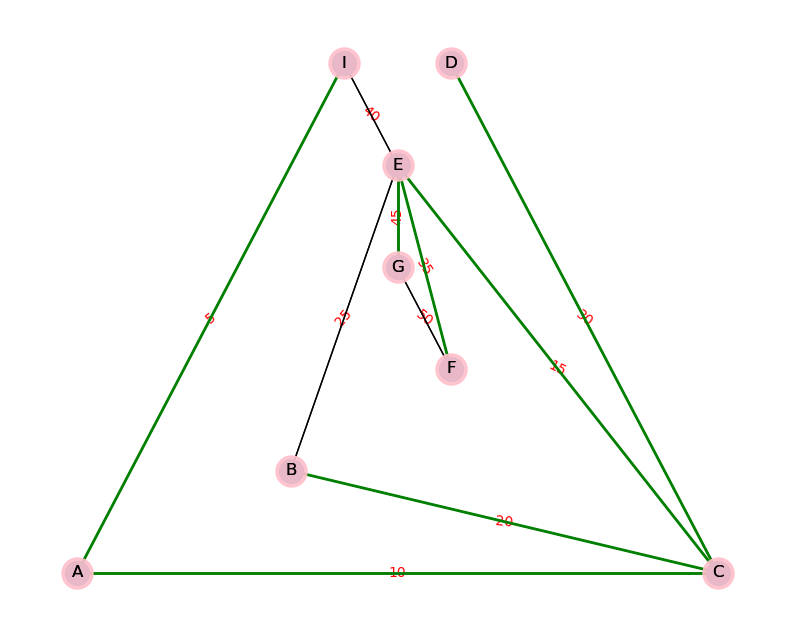

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C",{'weight':10}),("A","I",{'weight':5}),("C","B",{'weight':20}),("C","E",{'weight':15}),("C","D",{'weight':30}),("B","E",{'weight':25}),("I","E",{'weight':40}),("E","F",{'weight':35}),("F","G",{'weight':50}),("G","E",{'weight':45})]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

# Prim's Algorithm
def prim(G) :
    result = nx.Graph()
    done = {node : False for node in G.nodes()}
    done[list(G.nodes())[0]] = True
    
    while not all(done.values()) :
        minimumEdge = None
        minimumWeight = float('inf')
        for i in G.nodes() :
            if done[i] :
                for j, k in G.adj[i].items():
                    if not done[j] and k['weight'] < minimumWeight:
                        minimumEdge = (i, j)
                        minimumWeight = k['weight']
        
        if minimumEdge:
            result.add_edge(*minimumEdge, weight=minimumWeight)
            done[minimumEdge[1]] = True
    
    return result

result = prim(G)
nx.draw_networkx_edges(result, pos, edge_color='green', width=2)

plt.show()

## Djitraka's Shortest Path Algorithm

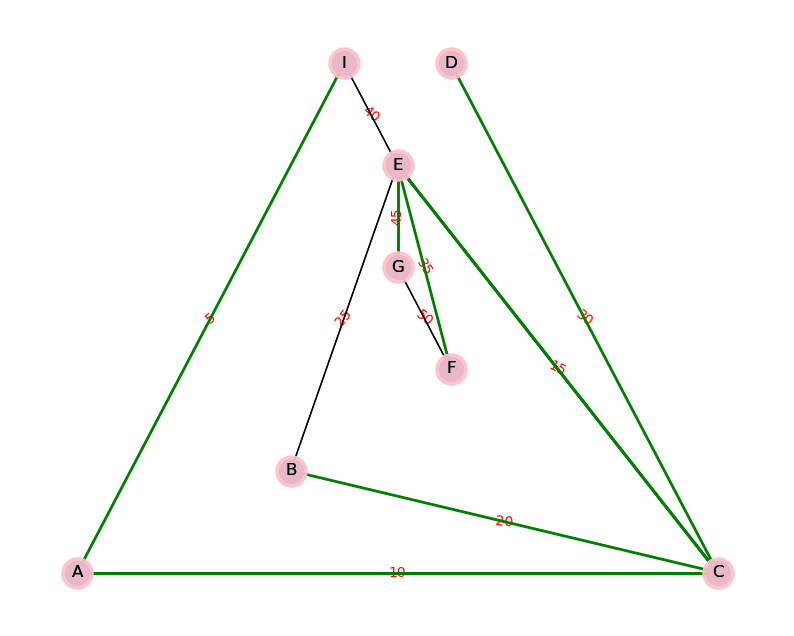

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C",{'weight':10}),("A","I",{'weight':5}),("C","B",{'weight':20}),("C","E",{'weight':15}),("C","D",{'weight':30}),("B","E",{'weight':25}),("I","E",{'weight':40}),("E","F",{'weight':35}),("F","G",{'weight':50}),("G","E",{'weight':45})]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

# Djitraka's Algorithm
def DJ(G, start) :
    shortest = {node : float('inf') for node in G.nodes()}
    shortest[start] = 0
    next = [(0, start)]
    
    while next :
        d, n = heapq.heappop(next)
        
        if d > shortest[n] :
            continue
        
        for nextNode, w in G[n].items() :
            distance = d + w['weight']
            if distance < shortest[nextNode] :
                shortest[nextNode] = distance
                heapq.heappush(next, (distance, nextNode))
    
    return shortest

start = list(G.nodes())[0]
shortest = DJ(G, start)
for node, distance in shortest.items() :
    if node != start :
        path = nx.shortest_path(G, source=start, target=node)
        nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1]) for i in range(len(path)-1)], edge_color='green', width=2)

plt.show()